# Lab 4

Authors: Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason

Date: Thursday, October 15th, 2020.

## - Description -

A lot of stats :(

In [53]:
# Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)
iris.head(9)

iris dataset shape:  (150, 5)


,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


## For each of the four numerical categories, compute the mean with a 95% confidence interval and show them in a bar chart.

No handles with labels found to put in legend.
(5.587288007345922, 6.099378659320745, 5.843333333333334, 'sepal_lens')
(2.941035937738766, 3.1669640622612345, 3.0540000000000003, 'sepal_wids')
(3.2453789208373314, 4.271954412496001, 3.758666666666666, 'petal_lens')
(0.9915461522694686, 1.405787181063865, 1.1986666666666668, 'petal_wids')


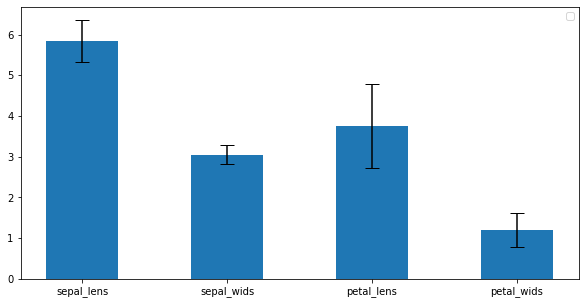

In [71]:
# NOTE: SEPAL LENGTH
sepal_lens = iris[['sep_length']].to_numpy()
sepal_wids = iris[['sep_width']].to_numpy()
petal_lens = iris[['pet_length']].to_numpy()
petal_wids = iris[['pet_width']].to_numpy()

all_arrays = [sepal_lens, sepal_wids, petal_lens, petal_wids]
names = ['sepal_lens', 'sepal_wids', 'petal_lens', 'petal_wids']
mean_data = []


# 1) take 50 samples WITH replacement.
# 2) take the average of those, append to a list L.
# 3) repeat 50 times.
# 4) find the standard deviation of L, this is SE.
for name, array in zip(names, all_arrays):
    sample_size = 50
    resample_count = 50
    x_bar = array.mean()
    samples = []
    sample_means = []

    for i in range(resample_count):
        for i in range(sample_size):
            idx = np.random.randint(0, 150)
            samples.append(array[idx])
        sample_means.append(np.mean(samples))
        samples.clear()

    SE = np.std(sample_means)
    lo = (x_bar - 1.96 * SE)
    hi = (x_bar + 1.96 * SE)

    mean_data.append((lo, hi, x_bar, name))

# For information.
for data in mean_data:
    print(data)

# Plotting
plt.rcParams['figure.figsize'] = [10, 5]
plt.bar(names, [data[2] for data in mean_data], yerr=[data[1] - data[0] for data in mean_data], capsize=7, width=0.5)
plt.legend()
plt.show()
pass